In [1]:
!pip install future
!pip install goslate
!pip install train
!pip install barbar

  Created wheel for goslate: filename=goslate-1.5.1-cp37-none-any.whl size=11376 sha256=afe5eb4cc517cdba5ad250e51a3da6f66a425bd4b205de59fa8fb6b1fab4f324
  Stored in directory: /root/.cache/pip/wheels/4f/7f/28/6f52271012a7649b54b1a7adaae329b4246bbbf9d1e4f6e51a
Successfully built goslate
  Created wheel for train: filename=train-0.0.5-cp37-none-any.whl size=8505 sha256=b4c802de64c023def5e02c1d7b747503a835363632d2de0223a3e86140a1b834
  Stored in directory: /root/.cache/pip/wheels/59/73/59/3adbf17bfc99047fd2c397d3425d1a5778227f1d6d48c0f9f8
Successfully built train


In [ ]:
from train import TrainerDeepSVDD
from preprocess import get_mnist
from test import eval
import pandas as pd 
import matplotlib.pyplot as myplot
import numpy as np
import torch
import os

class argum:
    pretrain = True
    num_epochs = 150
    num_epochs_ae = 150
    batch_size = 200
    normal_class = 1
    latent_dim = 32
    patience = 50
    lr = 1e-4
    lr_ae = 1e-4
    lr_milestones = [50]
    weight_decay = 0.5e-6
    weight_decay_ae = 0.5e-3
    
weight_path = '/content/weights'
if not os.path.isdir(weight_path): 
  os.mkdir(weight_path)

para_path = '/content/weights/pretrained_parameters.pth'
if not os.path.isfile(para_path):
  with open('/content/weights/pretrained_parameters.pth', 'w') as fp:
      pass

dvc = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
A = argum()
dt = get_mnist(A)
dpSVDD = TrainerDeepSVDD(A, dt, dvc)

if A.pretrain:
    dpSVDD.pretrain()

6742/6742: [===============================>] - ETA 0.2s
Pretraining Autoencoder... Epoch: 0, Loss: 164.241
6742/6742: [===============================>] - ETA 0.2s
Pretraining Autoencoder... Epoch: 1, Loss: 120.484
6742/6742: [===============================>] - ETA 0.2s
Pretraining Autoencoder... Epoch: 2, Loss: 86.048
6742/6742: [===============================>] - ETA 0.2s
Pretraining Autoencoder... Epoch: 3, Loss: 62.057
6742/6742: [===============================>] - ETA 0.2s
Pretraining Autoencoder... Epoch: 4, Loss: 46.508
6742/6742: [===============================>] - ETA 0.2s
Pretraining Autoencoder... Epoch: 5, Loss: 36.256
6742/6742: [===============================>] - ETA 0.2s
Pretraining Autoencoder... Epoch: 6, Loss: 29.208
6742/6742: [===============================>] - ETA 0.2s
Pretraining Autoencoder... Epoch: 7, Loss: 24.156
6742/6742: [===============================>] - ETA 0.2s
Pretraining Autoencoder... Epoch: 8, Loss: 20.402
6742/6742: [=======================

In [ ]:
dpSVDD.train()

6742/6742: [===============================>] - ETA 0.1s
Training Deep SVDD... Epoch: 0, Loss: 0.314
6742/6742: [===============================>] - ETA 0.1s
Training Deep SVDD... Epoch: 1, Loss: 0.089
6742/6742: [===============================>] - ETA 0.1s
Training Deep SVDD... Epoch: 2, Loss: 0.039
6742/6742: [===============================>] - ETA 0.1s
Training Deep SVDD... Epoch: 3, Loss: 0.024
6742/6742: [===============================>] - ETA 0.1s
Training Deep SVDD... Epoch: 4, Loss: 0.018
6742/6742: [===============================>] - ETA 0.1s
Training Deep SVDD... Epoch: 5, Loss: 0.015
6742/6742: [===============================>] - ETA 0.1s
Training Deep SVDD... Epoch: 6, Loss: 0.012
6742/6742: [===============================>] - ETA 0.1s
Training Deep SVDD... Epoch: 7, Loss: 0.011
6742/6742: [===============================>] - ETA 0.1s
Training Deep SVDD... Epoch: 8, Loss: 0.009
6742/6742: [===============================>] - ETA 0.1s
Training Deep SVDD... Epoch: 9, Lo

In [ ]:
label, scores = eval(dpSVDD.net, dpSVDD.c, dt[1],dvc)

Testing...
ROC AUC score: 99.52


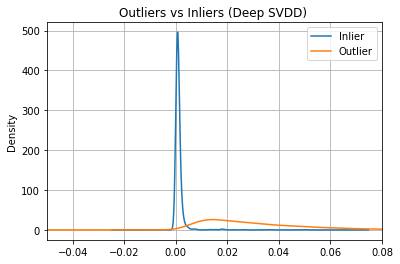

In [ ]:
inline = scores[np.where(label==0)[0]]
outline = scores[np.where(label==1)[0]]

actual_inline = pd.DataFrame(inline, columns=['Inlier'])
actual_outline = pd.DataFrame(outline, columns=['Outlier'])

fig, ax = myplot.subplots()
actual_inline.plot.kde(ax = ax, legend = True, title = 'Outliers vs Inliers (Deep SVDD)')
actual_outline.plot.kde(ax = ax, legend = True)
myplot.xlim(-0.05, 0.08)
ax.grid(axis = 'X')
ax.grid(axis = 'Y')
myplot.show()